We have length and width of sepals and petals of flower and we need to predict which species does that flower belongs to.

Import the libraies you need to solve the problem

In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
import warnings 
warnings.filterwarnings("ignore")

Import Data

In [47]:
data = pd.read_csv("iris.csv")

See the content of the dataset so that we could get the basic idea about data we are dealing with

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Keep required data only. Here we need sepal_length and sepal_width

In [48]:
data = data.drop(columns=['petal_length', 'petal_width',
       'species'], axis = 0)

Divide the data into features and label

In [5]:
data.head()


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [56]:
X = data["sepal_length"]
y = data["sepal_width"]

Now see the data type of each column in the data

See the information about the data to see if it contains any null values, data type of each column, total number of observations, etc

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
dtypes: float64(2)
memory usage: 2.4 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.0,3.3,4.4


Note : null and NA are two different things. So we need to check for them seperately. data.info()
will give if there is any null value in our data it doesn't talk about NA values in our data.

In [9]:
data.isna().sum()

sepal_length    0
sepal_width     0
dtype: int64

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
dtype: int64

Plot the box plot for data frames to check outliers
Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one.  Here the small circles outside the box plot denote the outliers. Outliers are generaly very few in number but if we take average of data then they massively affect the data. Therefore we remove them.


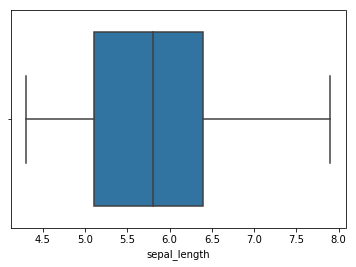

In [11]:
sb.boxplot(X)

Here data has no outliers. So no need to do anything.

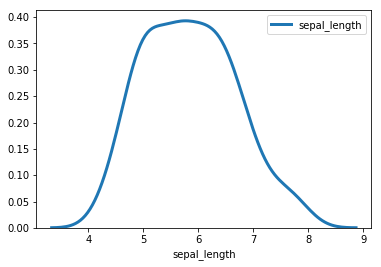

In [12]:
sb.distplot(X,hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "sepal_length")

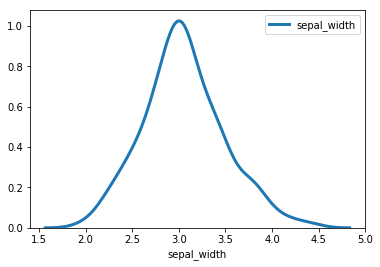

In [13]:
sb.distplot(y,hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "sepal_width")

Now our data is ready and we can apply the machine learning algorithms to our data.

This is a supervised problem. Here we'll apply linear regression algorithm with Normal Equation method.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, shuffle=False)

Normal Equation is an analytical approach to Linear Regression with a Least Square Cost Function. We can directly find out the value of θ without using Gradient Descent. Following this approach is an effective and a time-saving option when are working with a dataset with small features.

                            θ = (X.T * X)^-1 * (X.T * y)

In the above equation,
θ : hypothesis parameters that define it the best.
X : Input feature value of each instance.
Y : Output value of each instance.

In [58]:
def trains(x_data_train, y_data_train):
    # length of the train and test data sets.
    x_data_train = np.column_stack((np.ones((x_data_train.shape[0], 1), dtype=int), x_data_train))
    parameters = np.dot(inv(np.dot(np.transpose(x_data_train), x_data_train)),
                        np.dot(np.transpose(x_data_train), y_data_train))

    return parameters

In [59]:
def classify(x_data_test, parameters):

    x_data_test = np.column_stack((np.ones((x_data_test.shape[0], 1)), x_data_test))

    return np.dot(x_data_test, parameters)

In [60]:
def accuracy(y_data_test, y_pred_test):

    total_error = 0
    for i in range(0, len(y_data_test)):
        total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
    total_error = (total_error / len(y_data_test))
    accuracy = 1 - total_error
    return accuracy * 100

In [61]:
parameters = trains(X_train, y_train)
y_prediction = classify(X_test, parameters)
accuracy = accuracy(y_data_test, y_prediction)
print(accuracy)

[90.93738004]


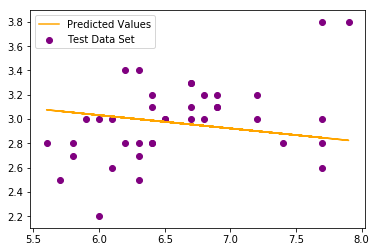

In [67]:
def plotgraph(x_data_test, y_data_test, y_pred):

    plt.scatter(x_data_test, y_data_test, color='purple', label='Test Data Set')
    plt.plot(x_data_test, y_pred, color='orange', label='Predicted Values')
    plt.legend()
    plt.show()
    
plotgraph(x_data_test, y_data_test, y_prediction)